In [7]:
!pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/73/da/d5d77a9a7a135c948dbf8d3b873655b105a152d69e590150c83d23c3d070/mlxtend-0.23.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 558.5 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 652.2 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 655.8 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.4 MB 610.0 kB/s eta 0:00:03
   ----- ---------------------------------- 0.2/1.4 MB 655.1 kB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 687.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.4 MB 654.2 kB/s eta 0:00:02
   ------- -------------------------------- 0.3

In [73]:
import numpy as np
import pandas as pd
import csv

import matplotlib.pyplot as plt
import networkx as nx

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [74]:
df = pd.read_csv("Market_Basket_Optimisation.csv")
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# DATA PREPROCESSING
df = []
with open('Market_Basket_Optimisation.csv') as file:
    csv_reader = csv.reader(file)
    for row in csv_reader:
        df.append(row)
df

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

In [76]:
# MAKING DATAFRAME
dataf = TransactionEncoder()
x = dataf.fit_transform(df)

df2 = pd.DataFrame(x, columns=dataf.columns_)

# DATASET OF ALL TRANSACTIONS 
df2

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
# TRAIN APRIORI ALGORITHM
F = apriori(df2, min_support=0.03, use_colnames=True)
F

,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


In [78]:
# VISUALIZE LIST OF RULES
rules = association_rules(F,metric='confidence', min_threshold=0.20)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(chocolate),(eggs),0.163845,0.179709,0.033196,0.202604,1.127397,0.003751,1.028711,0.135143
1,(french fries),(chocolate),0.170911,0.163845,0.034395,0.201248,1.228284,0.006393,1.046827,0.224169
2,(chocolate),(french fries),0.163845,0.170911,0.034395,0.209927,1.228284,0.006393,1.049383,0.222275
3,(milk),(chocolate),0.129583,0.163845,0.032129,0.247942,1.513276,0.010898,1.111823,0.389677
4,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197
5,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965
6,(spaghetti),(chocolate),0.174110,0.163845,0.039195,0.225115,1.373952,0.010668,1.079070,0.329550
7,(chocolate),(spaghetti),0.163845,0.174110,0.039195,0.239219,1.373952,0.010668,1.085581,0.325505
8,(french fries),(eggs),0.170911,0.179709,0.036395,0.212949,1.184961,0.005681,1.042232,0.188267
9,(eggs),(french fries),0.179709,0.170911,0.036395,0.202522,1.184961,0.005681,1.039640,0.190286


In [79]:
# HYPER PARAMETERS
hyper_rules = association_rules(F,metric='confidence', min_threshold=0.35)
hyper_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(frozen vegetables),(mineral water),0.095321,0.238368,0.035729,0.374825,1.572463,0.013007,1.218270,0.402413
1,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,0.474369
2,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,0.624943
3,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650,0.409465
4,(pancakes),(mineral water),0.095054,0.238368,0.033729,0.354839,1.488616,0.011071,1.180529,0.362712


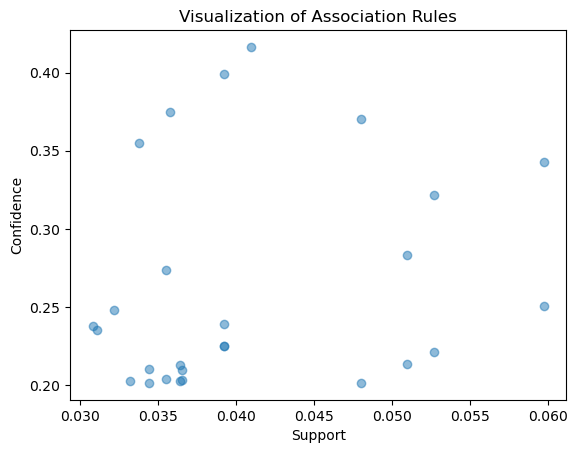

In [80]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Visualization of Association Rules')
plt.show()

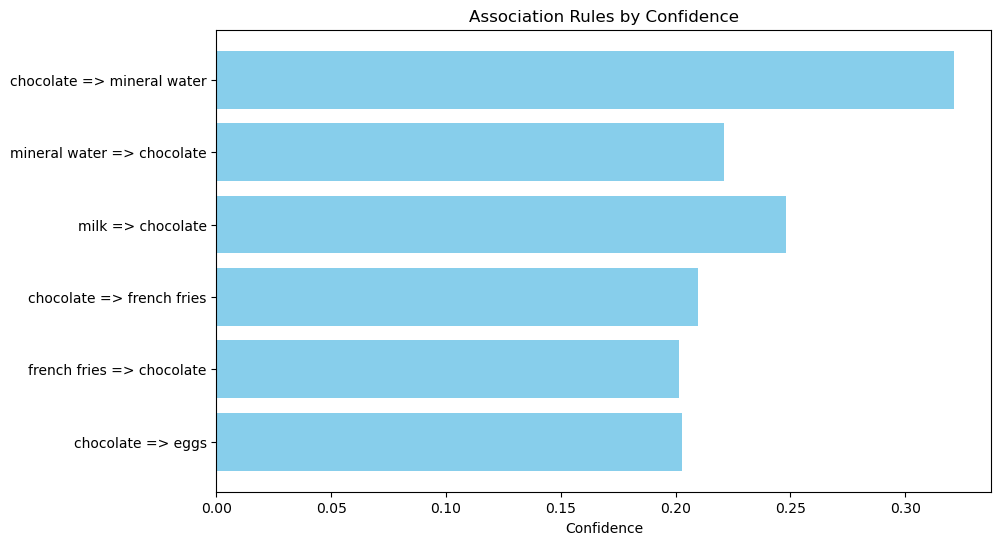

In [81]:
rules_sorted = rules.sort_values(by='confidence', ascending=False)

top_rules = rules.head(6)

plt.figure(figsize=(10, 6))
plt.barh(top_rules['antecedents'].apply(lambda x: ', '.join(x)) + ' => ' + top_rules['consequents'].apply(lambda x: ', '.join(x)),
         top_rules['confidence'], color='skyblue')
plt.xlabel('Confidence')
plt.title('Association Rules by Confidence')

plt.show()



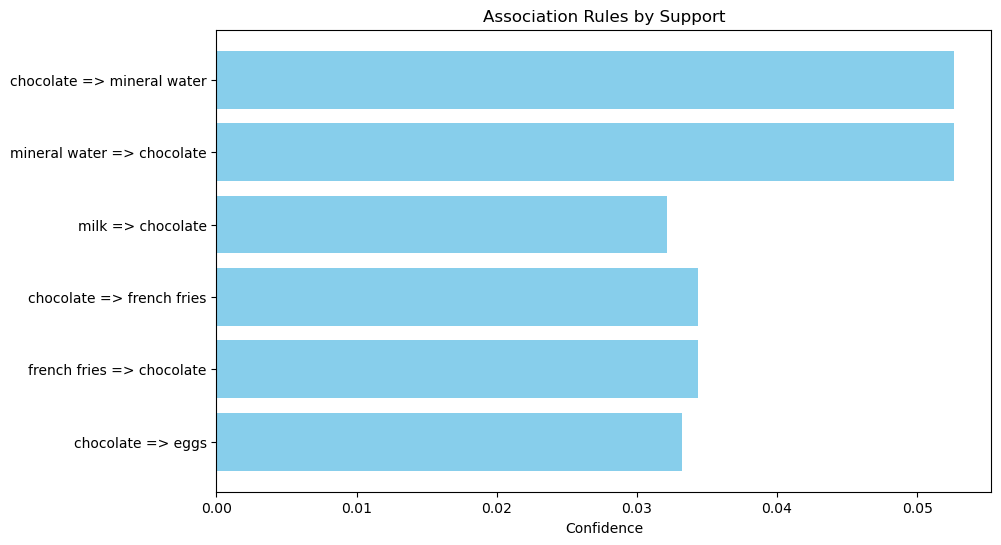

In [82]:
rules_sorted = rules.sort_values(by='confidence', ascending=False)

top_rules = rules.head(6)

plt.figure(figsize=(10, 6))
plt.barh(top_rules['antecedents'].apply(lambda x: ', '.join(x)) + ' => ' + top_rules['consequents'].apply(lambda x: ', '.join(x)),
         top_rules['support'], color='skyblue')
plt.xlabel('Confidence')
plt.title('Association Rules by Support')

plt.show()



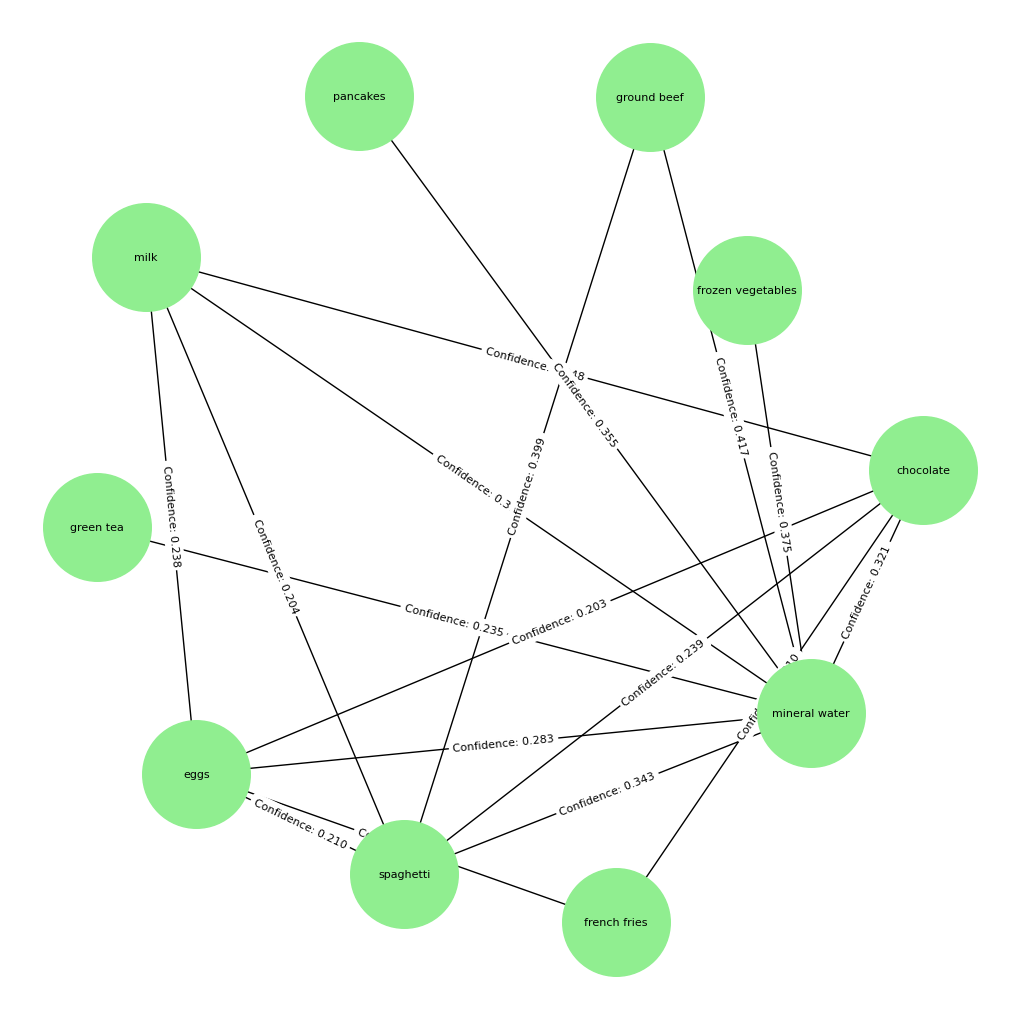

In [88]:
G = nx.Graph()

# GRAPH OF CONFIDENCE
for i, rule in rules.iterrows():
    antecedents = ", ".join(rule['antecedents'])
    consequents = ", ".join(rule['consequents'])
    rule_name = f"{antecedents} -> {consequents}"
    confidence = rule['confidence']

    G.add_node(antecedents, label=antecedents)
    G.add_node(consequents, label=consequents)
    G.add_edge(antecedents, consequents, label=f"Confidence: {confidence:.3f}")

# LABELLING
labels = {node: G.nodes[node]['label'] for node in G.nodes}
edge_labels = {edge: G.edges[edge]['label'] for edge in G.edges}

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, k=15)

nx.draw(G, pos, labels=labels, node_size=6000, font_size=8, node_color='lightgreen', with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.axis('off')
plt.show()